In [1]:
#importamos las librerias para analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#cargamos el dataset
df = pd.read_csv('Data/datasetEmcali.csv')

#mostramos las 5 primeras filas del dataset y las 5 ultimas
print(df.head(5))
print(df.tail(5))






             FECHA  TEMPERATURA  CONSUMO
0  12/01/2017 0:00         27.9    409.0
1  12/01/2017 1:00         29.0    387.0
2  12/01/2017 2:00         29.1    378.0
3  12/01/2017 3:00         28.2    370.0
4  12/01/2017 4:00         26.7    364.0
                       FECHA  TEMPERATURA  CONSUMO
29803   4/25/2021 7:00:00 PM         23.2      NaN
29804   4/25/2021 8:00:00 PM         23.2      NaN
29805   4/25/2021 9:00:00 PM         23.1      NaN
29806  4/25/2021 10:00:00 PM         23.1      NaN
29807  4/25/2021 11:00:00 PM         23.0      NaN


In [2]:
#mostramos la informacion del dataset
print(df.info())
#mostramos la descripcion del dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29808 entries, 0 to 29807
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        29808 non-null  object 
 1   TEMPERATURA  29616 non-null  float64
 2   CONSUMO      29520 non-null  float64
dtypes: float64(2), object(1)
memory usage: 698.8+ KB
None


In [3]:
print(df.describe())
#mostramos la cantidad de valores nulos
print(df.isnull().sum())

        TEMPERATURA       CONSUMO
count  29616.000000  29520.000000
mean      24.127714    455.574139
std        3.163467     95.616579
min       16.100000    227.000000
25%       21.800000    372.000000
50%       23.600000    447.000000
75%       26.300000    541.000000
max       34.000000    676.000000
FECHA            0
TEMPERATURA    192
CONSUMO        288
dtype: int64


In [4]:
#eliminamos los valores nulos
df.dropna(inplace=True)
#mostramos la cantidad de valores nulos despues de eliminarlos
print(df.isnull().sum())



FECHA          0
TEMPERATURA    0
CONSUMO        0
dtype: int64


In [5]:
print(df.describe())

        TEMPERATURA       CONSUMO
count  29328.000000  29328.000000
mean      24.130615    455.417061
std        3.169716     95.743113
min       16.100000    227.000000
25%       21.700000    372.000000
50%       23.600000    447.000000
75%       26.300000    541.000000
max       34.000000    676.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29328 entries, 0 to 29519
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        29328 non-null  object 
 1   TEMPERATURA  29328 non-null  float64
 2   CONSUMO      29328 non-null  float64
dtypes: float64(2), object(1)
memory usage: 916.5+ KB
None


In [7]:
#convertimos la columna de fecha a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], format="mixed")
#mostramos la informacion del dataset
print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
Index: 29328 entries, 0 to 29519
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        29328 non-null  datetime64[ns]
 1   TEMPERATURA  29328 non-null  float64       
 2   CONSUMO      29328 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 916.5 KB
None


,FECHA,TEMPERATURA,CONSUMO
0,2017-12-01 00:00:00,27.9,409.0
1,2017-12-01 01:00:00,29.0,387.0
2,2017-12-01 02:00:00,29.1,378.0
3,2017-12-01 03:00:00,28.2,370.0
4,2017-12-01 04:00:00,26.7,364.0
...,...,...,...
29515,2021-04-13 19:00:00,23.3,588.0
29516,2021-04-13 20:00:00,23.3,567.0
29517,2021-04-13 21:00:00,23.2,534.0
29518,2021-04-13 22:00:00,23.1,493.0


In [8]:

print(df.info())
#truncamos la columna fecha a solo la fecha
df['FECHA'] = df['FECHA'].dt.date




<class 'pandas.core.frame.DataFrame'>
Index: 29328 entries, 0 to 29519
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        29328 non-null  datetime64[ns]
 1   TEMPERATURA  29328 non-null  float64       
 2   CONSUMO      29328 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 916.5 KB
None


In [12]:
#agrupamos por fecha y calculamos promedio de los valores e incluimos la fecha
df_grouped = df.groupby('FECHA').mean().reset_index()
#convertimos la columna de fecha a tipo date
df_grouped['FECHA'] = pd.to_datetime(df_grouped['FECHA'])
#mostramos la informacion del dataset
print(df_grouped.info())
df_grouped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1230 non-null   datetime64[ns]
 1   TEMPERATURA  1230 non-null   float64       
 2   CONSUMO      1230 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 29.0 KB
None


,FECHA,TEMPERATURA,CONSUMO
0,2017-12-01,23.383333,494.291667
1,2017-12-02,23.595833,449.583333
2,2017-12-03,25.170833,399.291667
3,2017-12-04,24.454167,492.125000
4,2017-12-05,25.433333,514.833333
...,...,...,...
1225,2021-04-09,22.941667,477.375000
1226,2021-04-10,24.358333,451.375000
1227,2021-04-11,24.358333,407.458333
1228,2021-04-12,24.195833,491.833333


                FECHA  TEMPERATURA   CONSUMO
FECHA        1.000000    -0.054162 -0.155419
TEMPERATURA -0.054162     1.000000  0.192287
CONSUMO     -0.155419     0.192287  1.000000


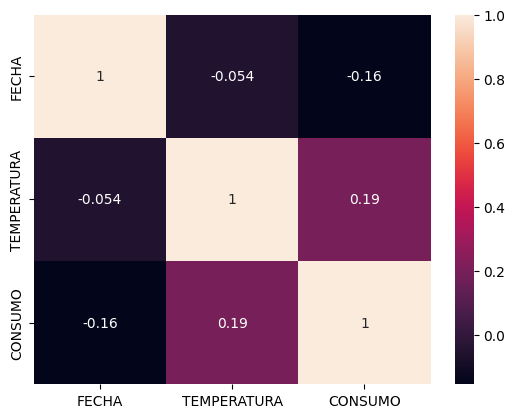

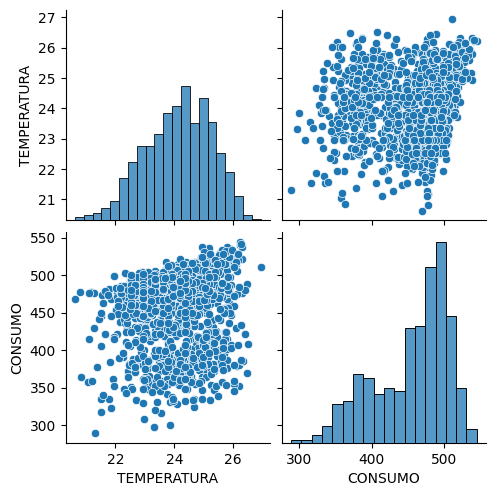

In [14]:
#calculamos la correlacion entre las columnas
correlation = df_grouped.corr()
#mostramos la correlacion
print(correlation)
#graficamos la correlacion
sns.heatmap(correlation, annot=True)
plt.show()
#graficamos la correlacion
sns.pairplot(df_grouped)
plt.show()

In [ ]:
df.head

